In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
badminimax = pd.read_csv("scores_badMinimaxVsRand.csv")
minimax = pd.read_csv("scores_MinimaxvsRand.csv")
rand = pd.read_csv("scores_RandvsRand.csv")

Text(0.5, 1.0, 'Combined Boxplot')

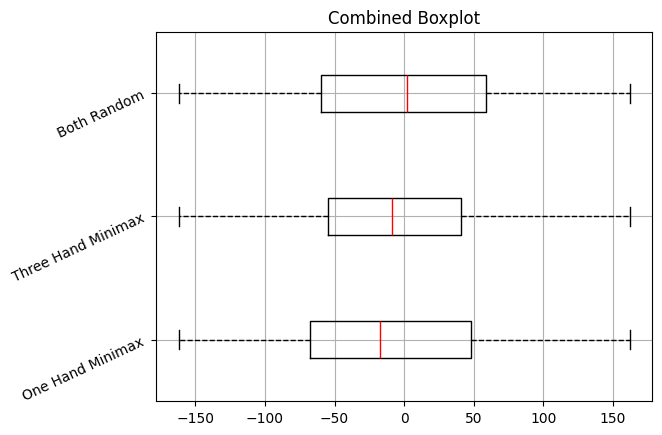

In [47]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([badminimax["diff"], minimax["diff"], rand["diff"]], index=["One Hand Minimax", "Three Hand Minimax", "Both Random"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('Combined Boxplot')

Text(0.5, 1.0, 'MiniMax Boxplot')

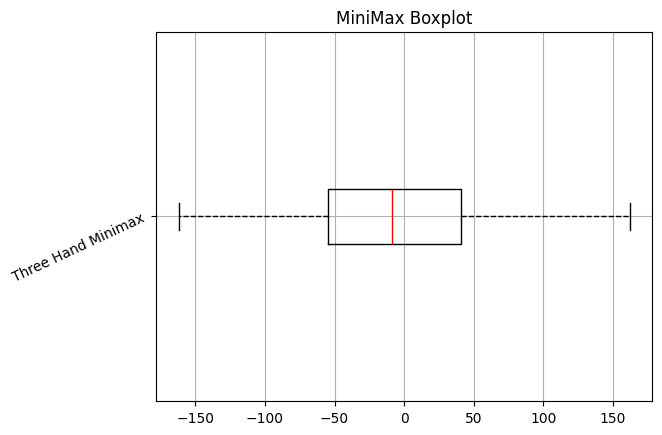

In [48]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([minimax["diff"]], index=["Three Hand Minimax"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('MiniMax Boxplot')

Text(0.5, 1.0, 'One Hand MiniMax Boxplot')

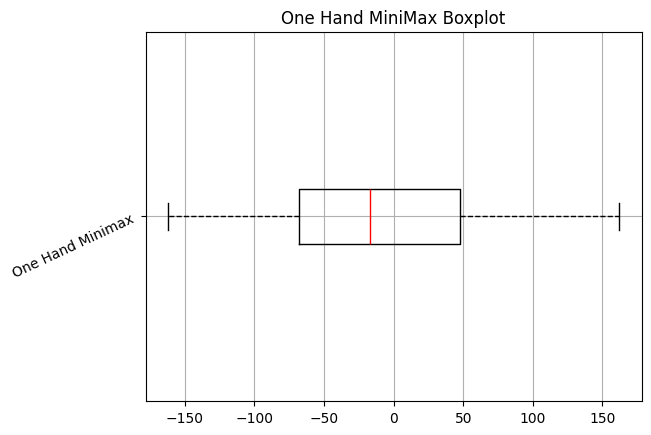

In [49]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([badminimax["diff"]], index=["One Hand Minimax"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('One Hand MiniMax Boxplot')

Text(0.5, 1.0, 'Both Random Boxplot')

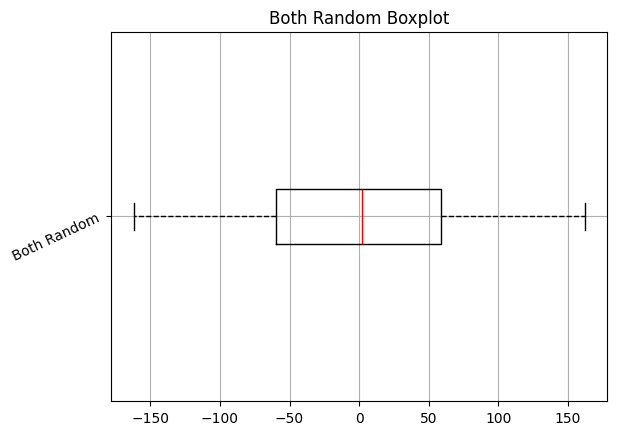

In [50]:
badminimax["diff"] = badminimax["Us"] - badminimax["Them"]
minimax["diff"] = minimax["Us"] - minimax["Them"]
rand["diff"] = rand["Us"] - rand["Them"]
df = pd.DataFrame([rand["diff"]], index=["Both Random"])


df.T.boxplot(vert=False, color=dict(medians="r", boxes="black"), whiskerprops=dict(linestyle="--"))
plt.yticks(rotation=25)
plt.title('Both Random Boxplot')